<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/02_Data_Exploration_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Set up WD

In [1]:
# Mount GDrive to facilitate data import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change working directory to project folder
%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


## Import data and set categoricals

In [3]:
# Importing the data

import pandas as pd
eppes_cleaned = pd.read_csv('eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)
eppes_cleaned

,q1.1,q1.2,q1.3,q1.4,q1.5,q1.6,q1.7,q1.8,q1.9,q1.10,...,d43a,d43b,d46.8,d60,d62_1,d62_2,d63,d72_1,d72_2,d77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,6.0,1.0,3.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,2.0,6.0,3.0,2.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,6.0,6.0,3.0,4.0,2.0,2.0
27462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,2.0


In [4]:
eppes_cleaned.dtypes.value_counts()

float64    311
dtype: int64

In [5]:
# Import Excel sheet containing column indeces to be dropped

columns_analysis = pd.read_excel(r'Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

In [6]:
# Create list of names of categorical columns 

col_names_categorical = []

for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

In [7]:
# Change datatype of categorical variables to object

eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

eppes_cleaned.dtypes.value_counts()

object     167
float64    144
dtype: int64

## Data Exploration and Visualisation

In [60]:
import seaborn as sns
from matplotlib import rcParams

### Simple count statistics

In [ ]:
# voting behavior percentages
eppes_cleaned["qg1"].value_counts(normalize = True)

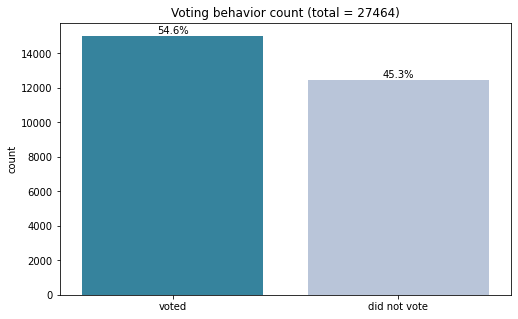

In [119]:
# voting behavior total count with percentages

rcParams['figure.figsize'] = 8.09,5

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior count (total = 27464)')

percentage = [54.6, 45.3]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [118]:
# class affiliation percentages

eppes_cleaned["d63"].value_counts(normalize = True)

3.0    0.472692
1.0    0.264419
2.0    0.148194
4.0    0.068126
9.0    0.022284
7.0    0.009758
5.0    0.006918
8.0    0.005680
6.0    0.001930
Name: d63, dtype: float64

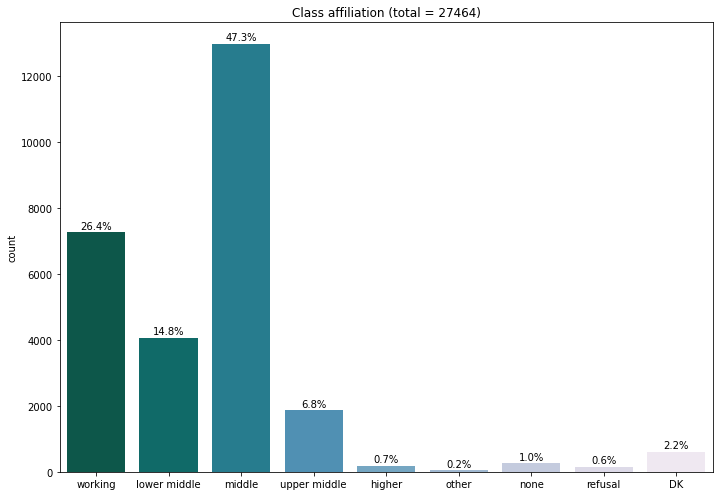

In [121]:
# class affiliation totals with percentages

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

countplot = sns.countplot(data = eppes_cleaned, x = "d63", palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["working", "lower middle", "middle", "upper middle", "higher", "other", "none", "refusal", "DK"])
countplot.set(title='Class affiliation (total = 27464)')

percentage = [26.4, 14.8, 47.3, 6.8, 0.7, 0.2, 1.0, 0.6, 2.2]
patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [122]:
# gender percentages (man = 1, woman = 2)

eppes_cleaned["d10"].value_counts(normalize = True)

2.0    0.54231
1.0    0.45769
Name: d10, dtype: float64

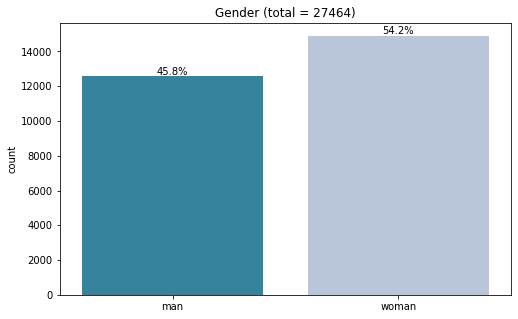

In [127]:
# gender total
rcParams['figure.figsize'] = 8.09,5

countplot = sns.countplot(data = eppes_cleaned, x = "d10", order=[1.0, 2.0], palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["man", "woman"])
countplot.set(title='Gender (total = 27464)')

percentage = [45.8, 54.2]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

### Voting Behavior distributions

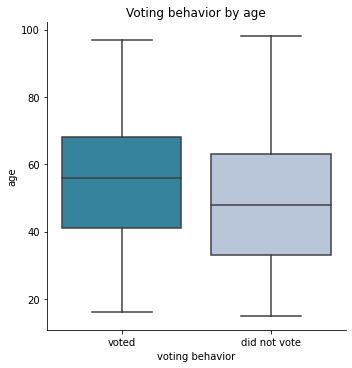

In [134]:
# voting behavior and age
catplot = sns.catplot(data=eppes_cleaned, x="qg1", y="d11", kind="box", palette='PuBuGn_r')
catplot.set(xlabel='voting behavior', ylabel='age')
catplot.set(xticklabels=["voted", "did not vote"])
catplot.set(title='Voting behavior by age')

In [152]:
# gender voted totals (man = 1, woman = 2)

eppes_cleaned.groupby("qg1")["d10"].value_counts(normalize = False)

qg1  d10
1.0  2.0    7967
     1.0    7041
2.0  2.0    6927
     1.0    5529
Name: d10, dtype: int64

In [153]:
# gender voted percentages (man = 1, woman = 2)

eppes_cleaned.groupby("qg1")["d10"].value_counts(normalize = True)

qg1  d10
1.0  2.0    0.530850
     1.0    0.469150
2.0  2.0    0.556118
     1.0    0.443882
Name: d10, dtype: float64

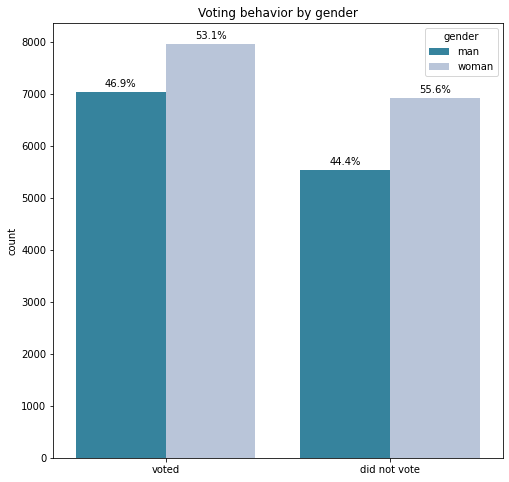

In [163]:
# voting behavior by gender

rcParams['figure.figsize'] = 8.05,8

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", hue = "d10", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior by gender')

countplot.legend(title='gender', loc='upper right', labels=['man', 'woman'])

percentage = [46.9, 44.4, 53.1, 55.6]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [158]:
# Frequency of discussion percentages (man = 1, woman = 2)

eppes_cleaned.groupby("qg1")["d71a_2"].value_counts(normalize = True)

qg1  d71a_2
1.0  2.0       0.590618
     3.0       0.211754
     1.0       0.193763
     4.0       0.003865
2.0  2.0       0.491089
     3.0       0.409762
     1.0       0.091442
     4.0       0.007707
Name: d71a_2, dtype: float64

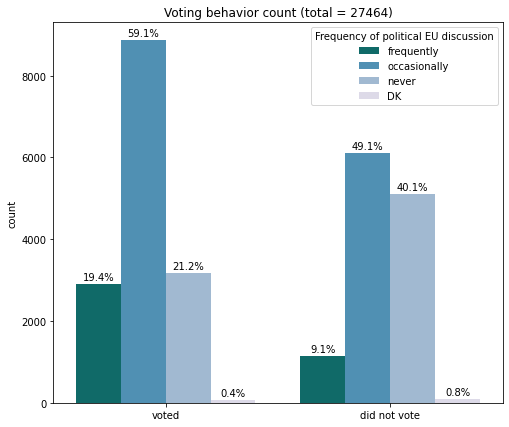

In [164]:
# voting behavior: "When you get together with friends or relatives, would you say you discuss frequently, occasionally or never about European political matters?""

rcParams['figure.figsize'] = 8.05,7

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", hue = "d71a_2", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior count (total = 27464)')

countplot.legend(title='Frequency of political EU discussion', loc='upper right', labels=['frequently', 'occasionally', 'never', 'DK'])

percentage = [19.4, 9.1, 59.1, 49.1, 21.2, 40.1, 0.4, 0.8]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')